<p style="font-size: 24px; font-weight: bold;">What are the most demanded skills for top 3 most popular data roles in United States?</p>

<p style="font-size: 18px; font-weight: normal;">Methodology:</p>
<ul style="font-size: 18px;">
    <li>1. Clean-up skill column from the dataset</li>
    <li>2. Calculate the skill count based on the column 'job_title_short'</li>
    <li>3. Calculate skill percentage</li>
    <li>4. Plot the final findings</li>
</ul>

In [2]:
#Importing required libraries
import ast
import pandas as pd
import numpy as np
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()



#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\maheb\anaconda3\envs\python_data_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_US = df[df['job_country'] == 'United States']

In [4]:
df_skills = df_US.explode('job_skills')

In [5]:
df_count_skills = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_count_skills = df_count_skills.reset_index(name='skill_count')
df_count_skills.sort_values(by='skill_count', ascending=False, inplace=True)



In [7]:
job_title_list = sorted(df_count_skills['job_title_short'].unique()[:3].tolist())
 

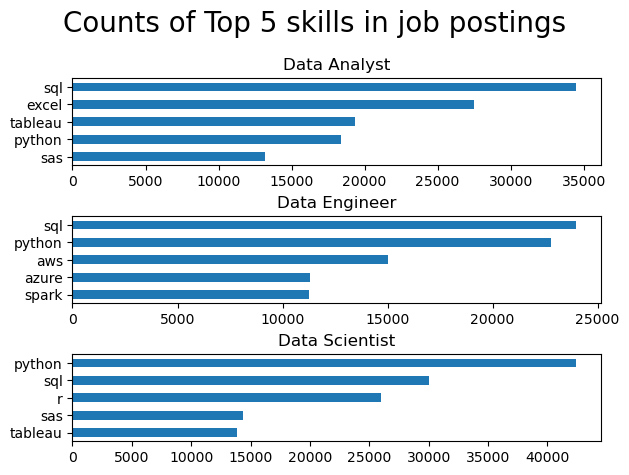

In [8]:
fig, ax = plt.subplots(len(job_title_list),1)
for i, title in enumerate(job_title_list):
    df_plot = df_count_skills[df_count_skills['job_title_short'] == title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
plt.suptitle('Counts of Top 5 skills in job postings', fontsize=20)
plt.tight_layout(h_pad=0.5) 
plt.show()

In [13]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='total_jobs')
df_skills_precentage = pd.merge(df_count_skills, df_job_title_count, how='left', on='job_title_short')

In [16]:
df_skills_precentage['skill_perc'] = (df_skills_precentage['skill_count']/df_skills_precentage['total_jobs'])*100

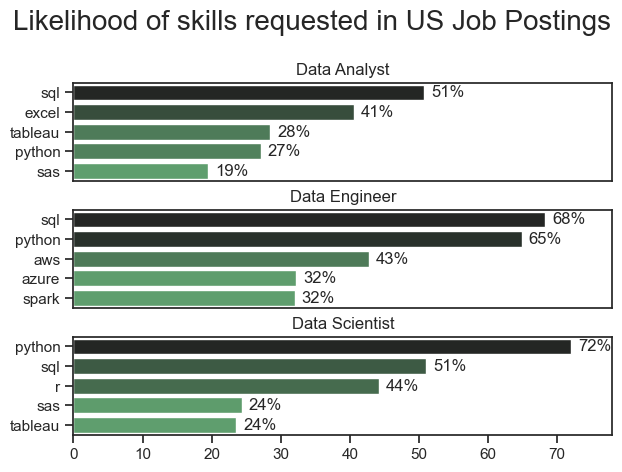

In [39]:
 fig, ax = plt.subplots(len(job_title_list),1)
for i, title in enumerate(job_title_list):
    df_plot = df_skills_precentage[df_skills_precentage['job_title_short'] == title].head(5)
    sns.barplot(data=df_plot, x='skill_perc', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:g_r')
    sns.set_theme(style='ticks')
    ax[i].set_title(title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,78)
    
    for index, value in enumerate(df_plot['skill_perc']):
        ax[i].text(value + 1, index, f'{value:.0f}%', va='center')
    
    if i != len(job_title_list) -1:
       ax[i].set_xticks([])
    
plt.suptitle('Likelihood of skills requested in US Job Postings', fontsize=20)
plt.tight_layout(h_pad=0.5) 
plt.show()